In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , models , layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train,y_train) , (x_test , y_test) = datasets.mnist.load_data() 

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [7]:
x_test.shape

(10000, 28, 28)

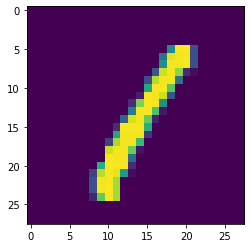

In [8]:
plt.imshow(x_train[3])

In [9]:
y_train[3]

1

# Normalize

In [10]:
x_train = x_train/255
x_test = x_test / 255

# ANN


In [11]:
ann = models.Sequential([
    
    layers.Flatten(input_shape =(28,28)),
    layers.Dense(1000 , activation='relu'),
    layers.Dense(10 ,activation = 'softmax')
])
ann.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1837 - accuracy: 0.9442
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0752 - accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0219 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0144 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [12]:
x_test.shape



(10000, 28, 28)

In [13]:
y_test.shape

(10000,)

In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9833


[0.06784611195325851, 0.983299970626831]

In [15]:
y_predicted = ann.predict(x_test)

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

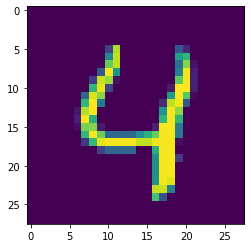

In [18]:
plt.imshow(x_test[4])

In [19]:
x_train=x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters = 15, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 30, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    ##ann layer for classification
    layers.Flatten(),
    layers.Dense(30,activation='relu'),
    layers.Dense(10,activation= 'softmax')
])

In [21]:
cnn.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [22]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1889 - accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0617 - accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0245 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9896


[0.03153300657868385, 0.9896000027656555]

In [24]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [26]:
y_predicted = cnn.predict(x_test)
y_predicted[:3]

array([[2.1637039e-11, 2.5311999e-07, 7.0430062e-08, 2.2635217e-07,
        1.2472220e-10, 5.0473274e-09, 2.0621282e-16, 9.9999940e-01,
        4.8529487e-09, 2.4465368e-08],
       [5.5732072e-09, 3.3865649e-07, 9.9999964e-01, 1.3609590e-10,
        1.0961680e-13, 6.9645879e-13, 1.0102535e-09, 4.1533596e-11,
        1.0781388e-09, 4.3180319e-13],
       [4.2991712e-08, 9.9999511e-01, 1.5926744e-08, 6.6909406e-10,
        1.8185549e-06, 1.6826954e-06, 6.1273937e-08, 2.9919963e-07,
        8.9792377e-07, 3.8718472e-08]], dtype=float32)

In [28]:
y_predicted_classes = [np.argmax(i) for i in y_predicted]
y_predicted_classes[:3]

[7, 2, 1]